In [3]:
import pandas as pd

In [24]:
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [25]:
# 2. Check the shape (rows, columns)
print(df.shape)

(7043, 21)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
# 4. Basic statistics of numeric columns
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [30]:
# 5. Preview first and last rows
print(df.head())
print(df.tail())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [61]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [31]:
# 6. Check for duplicate rows
print(df.duplicated().sum())

0


In [33]:
# Fix TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [35]:
# Check missing values
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [37]:
# Drop missing TotalCharges rows
df_cleaned = df.dropna()

<Axes: xlabel='Churn', ylabel='count'>

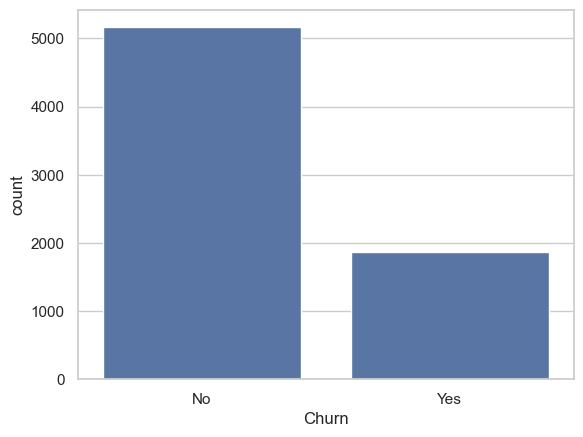

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Univariate: Churn
sns.countplot(data=df_cleaned, x='Churn')



<Axes: xlabel='tenure', ylabel='Count'>

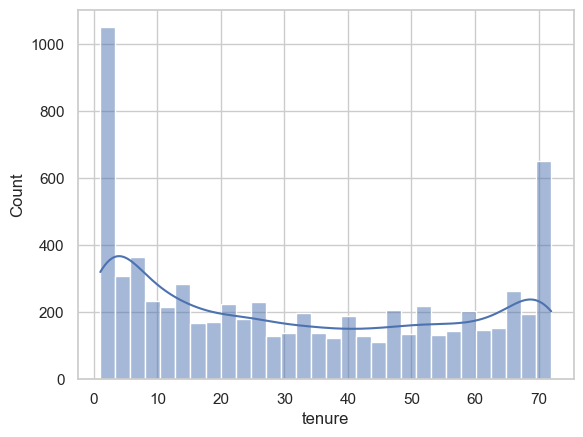

In [48]:
# Univariate: Tenure
sns.histplot(df_cleaned['tenure'], bins=30, kde=True)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

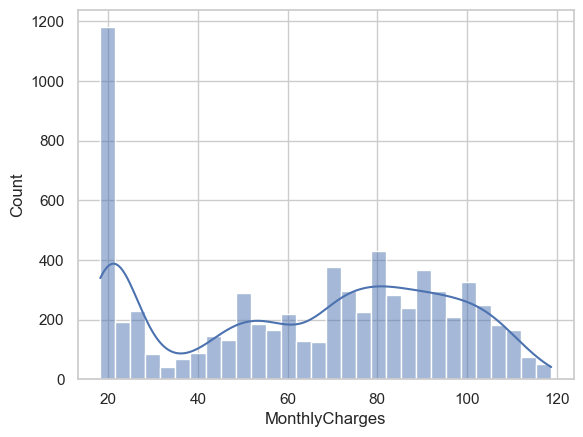

In [41]:
# Univariate: MonthlyCharges
sns.histplot(df_cleaned['MonthlyCharges'], bins=30, kde=True)

<Axes: xlabel='Contract', ylabel='count'>

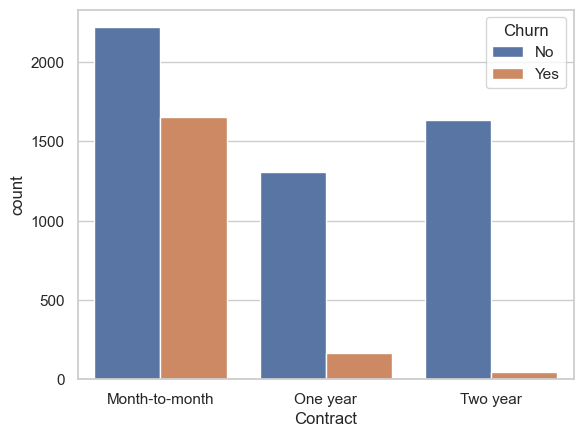

In [50]:
# Bivariate: Contract vs Churn
sns.countplot(data=df_cleaned, x='Contract', hue='Churn')

<Axes: xlabel='InternetService', ylabel='count'>

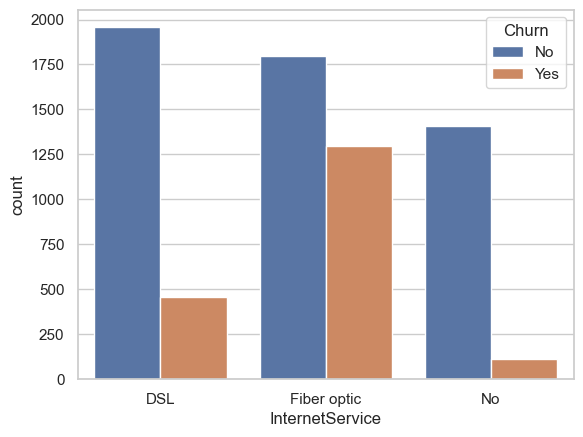

In [43]:
# Bivariate: InternetService vs Churn
sns.countplot(data=df_cleaned, x='InternetService', hue='Churn')


<Axes: >

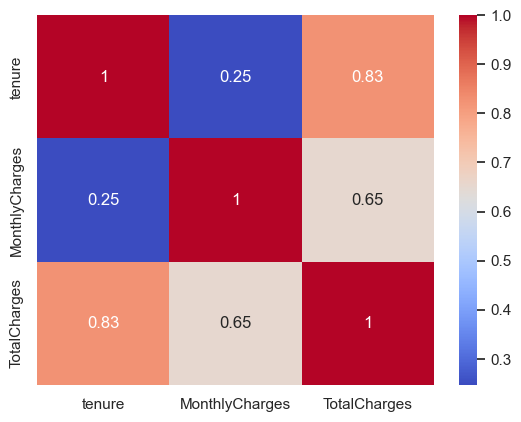

In [44]:
# Correlation Matrix
sns.heatmap(df_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')

##Feature Engineering##

In [70]:
# Step: Fix Feature Engineering Safely

# 1. Check and Confirm the datatypes first
print(df_cleaned.dtypes[['tenure', 'MonthlyCharges']])

# 2. Redefine the correct functions
def tenure_group(tenure):
    if pd.isna(tenure):
        return None
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

def high_spender(monthly_charge):
    if pd.isna(monthly_charge):
        return None
    if monthly_charge > 80:
        return 'High'
    elif monthly_charge > 40:
        return 'Medium'
    else:
        return 'Low'

# 3. Apply properly using .loc to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'TenureGroup'] = df_cleaned['tenure'].apply(tenure_group)
df_cleaned.loc[:, 'SpenderCategory'] = df_cleaned['MonthlyCharges'].apply(high_spender)
df_cleaned.loc[:, 'SeniorCitizenFlag'] = df_cleaned['SeniorCitizen'].apply(lambda x: 'Senior' if x == 1 else 'Non-Senior')

# 4. Check if values are populated now
print(df_cleaned[['tenure', 'TenureGroup', 'MonthlyCharges', 'SpenderCategory', 'SeniorCitizenFlag']].head(10))


tenure              int64
MonthlyCharges    float64
dtype: object
   tenure TenureGroup  MonthlyCharges SpenderCategory SeniorCitizenFlag
0       1    0-1 year           29.85             Low        Non-Senior
1      34   2-4 years           56.95          Medium        Non-Senior
2       2    0-1 year           53.85          Medium        Non-Senior
3      45   2-4 years           42.30          Medium        Non-Senior
4       2    0-1 year           70.70          Medium        Non-Senior
5       8    0-1 year           99.65            High        Non-Senior
6      22   1-2 years           89.10            High        Non-Senior
7      10    0-1 year           29.75             Low        Non-Senior
8      28   2-4 years          104.80            High        Non-Senior
9      62    5+ years           56.15          Medium        Non-Senior


In [71]:
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,SpenderCategory,SeniorCitizenFlag
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year,Low,Non-Senior
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,2-4 years,Medium,Non-Senior
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year,Medium,Non-Senior
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2-4 years,Medium,Non-Senior
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year,Medium,Non-Senior


In [73]:
# Step 5 Fix: Logistic Regression with scaling and more iterations

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 1. Build a pipeline: scaling + logistic regression
model_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42)
)

# 2. Train the pipeline
model_pipeline.fit(X_train, y_train)

# 3. Predict
y_pred = model_pipeline.predict(X_test)

# 4. Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

(accuracy, conf_matrix, classification_rep)


(0.7882018479033405,
 array([[921, 112],
        [186, 188]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86      1033\n           1       0.63      0.50      0.56       374\n\n    accuracy                           0.79      1407\n   macro avg       0.73      0.70      0.71      1407\nweighted avg       0.78      0.79      0.78      1407\n')

In [83]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assume y_test (actual labels) and y_pred (model predictions) are already available
# If not, replace with your actual variables

# 1. Get accuracy
accuracy = accuracy_score(y_test, y_pred)

# 2. Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# 3. Get classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# 4. Create a results table automatically
results_data = {
    "Metric": [
        "Accuracy",
        "True Negatives (TN)",
        "False Positives (FP)",
        "False Negatives (FN)",
        "True Positives (TP)",
        "Precision (Not Churn)",
        "Recall (Not Churn)",
        "F1 Score (Not Churn)",
        "Precision (Churn)",
        "Recall (Churn)",
        "F1 Score (Churn)"
    ],
    "Value": [
        round(accuracy , 3),
        TN,
        FP,
        FN,
        TP,
        round(report['0']['precision'], 2),
        round(report['0']['recall'], 2),
        round(report['0']['f1-score'], 2),
        round(report['1']['precision'], 2),
        round(report['1']['recall'], 2),
        round(report['1']['f1-score'], 2)
    ]
}

# 5. Build DataFrame
results_table = pd.DataFrame(results_data)

# 6. Display
print(results_table)

                   Metric    Value
0                Accuracy    0.788
1     True Negatives (TN)  921.000
2    False Positives (FP)  112.000
3    False Negatives (FN)  186.000
4     True Positives (TP)  188.000
5   Precision (Not Churn)    0.830
6      Recall (Not Churn)    0.890
7    F1 Score (Not Churn)    0.860
8       Precision (Churn)    0.630
9          Recall (Churn)    0.500
10       F1 Score (Churn)    0.560


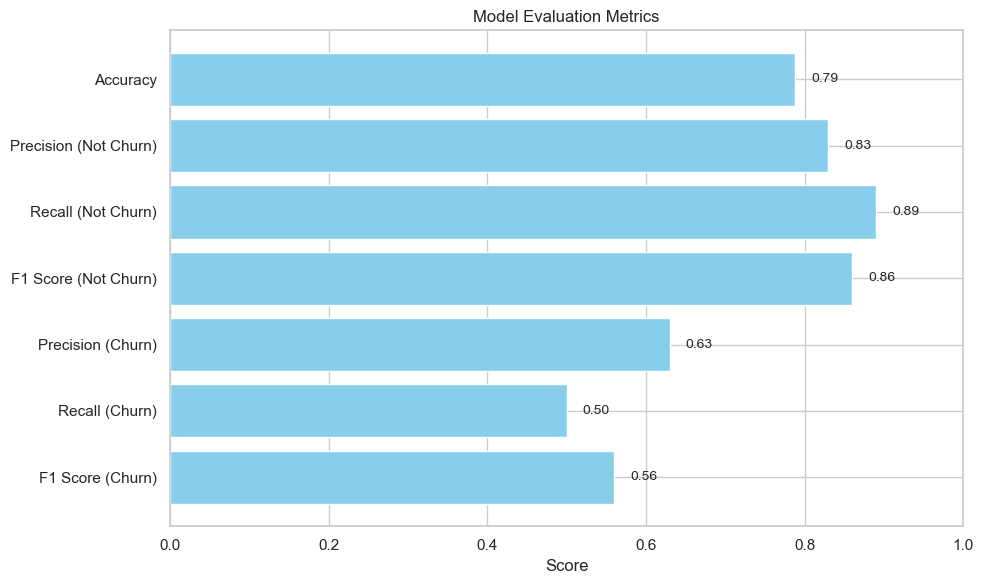

In [84]:
import matplotlib.pyplot as plt

# Select only model evaluation scores (skip confusion matrix numbers)
plot_data = results_table[results_table['Metric'].isin([
    'Accuracy', 
    'Precision (Not Churn)', 'Recall (Not Churn)', 'F1 Score (Not Churn)', 
    'Precision (Churn)', 'Recall (Churn)', 'F1 Score (Churn)'
])]

# Plot
plt.figure(figsize=(10,6))
bars = plt.barh(plot_data['Metric'], plot_data['Value'], color='skyblue')
plt.xlabel('Score')
plt.title('Model Evaluation Metrics')
plt.xlim(0, 1)

# Add text labels to bars
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Highest value on top
plt.tight_layout()
plt.show()


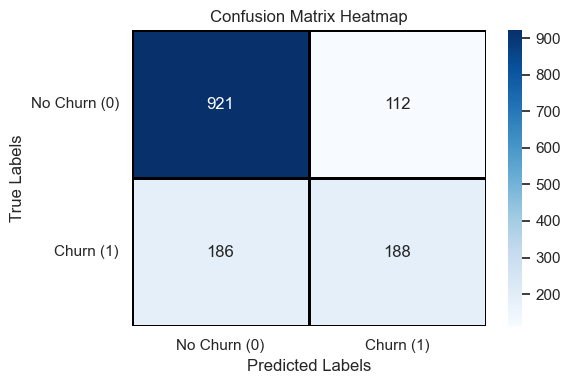

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume y_test and y_pred are available from your model

# 1. Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

# 3. Add labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# 4. Tick labels
plt.xticks(ticks=[0.5, 1.5], labels=['No Churn (0)', 'Churn (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Churn (0)', 'Churn (1)'], rotation=0)

plt.tight_layout()
plt.show()


C:\Users\rocki\AppData\Local\Temp\ipykernel_11384\121089514.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


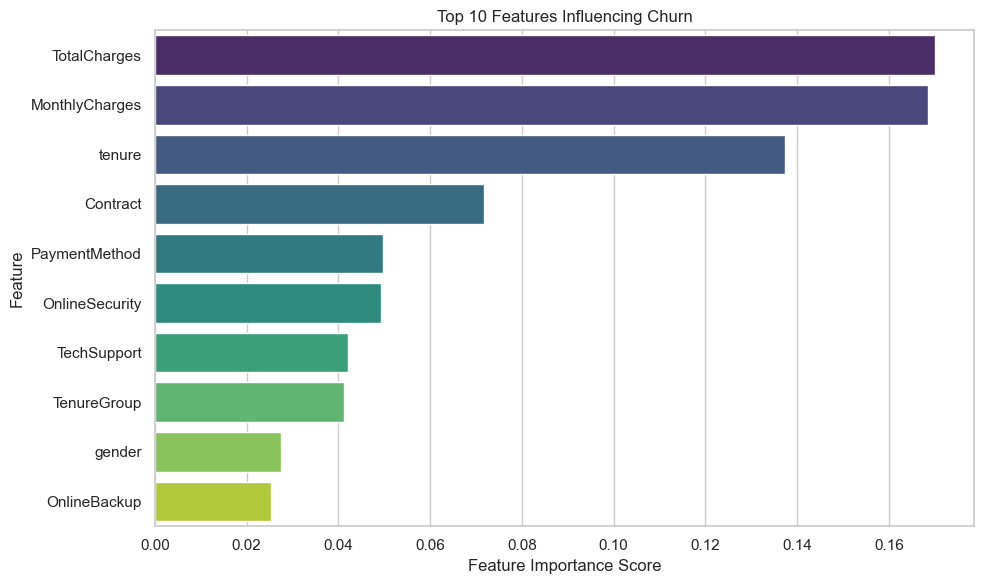

In [86]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# 1. Train a Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Get Feature Importances
importances = rf_model.feature_importances_
features = X_train.columns

# 3. Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Plot the top 10 important features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Features Influencing Churn')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


      CustomerID  Churn_Risk_Score Risk_Level
855         4565              1.00  High Risk
16          6670              1.00  High Risk
866         1873              1.00  High Risk
299         4601              1.00  High Risk
985         5928              1.00  High Risk
1268        5151              1.00  High Risk
224         5695              0.99  High Risk
1053        4215              0.99  High Risk
857         1723              0.99  High Risk
1112        3632              0.99  High Risk


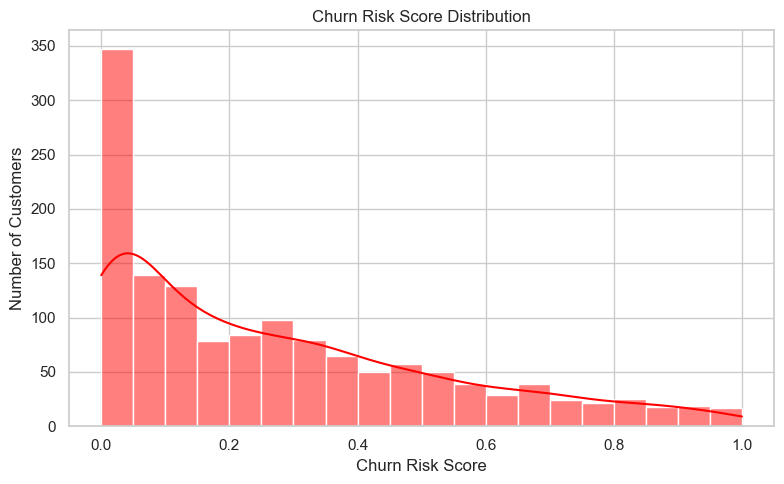

In [91]:
 # 1. Import again if needed
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load your prepared and cleaned data (df_encoded should already be created!)

# 3. Before split: Separate CustomerID
customer_ids = df_encoded['customerID']

# 4. Create feature set (X) and target set (y)
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']

# 5. Now split features, target, and customer IDs together
X_train, X_test, y_train, y_test, customerID_train, customerID_test = train_test_split(
    X, y, customer_ids, test_size=0.2, random_state=42
)

# 6. Build and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 7. Predict churn probabilities
churn_probabilities = rf_model.predict_proba(X_test)[:, 1]

# 8. Create Risk Table
churn_risk_df = pd.DataFrame({
    'CustomerID': customerID_test.values,
    'Churn_Risk_Score': churn_probabilities
})

# 9. Rank by risk
churn_risk_df = churn_risk_df.sort_values(by='Churn_Risk_Score', ascending=False)

# 10. Categorize Risk Level
def categorize_risk(score):
    if score >= 0.75:
        return 'High Risk'
    elif score >= 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

churn_risk_df['Risk_Level'] = churn_risk_df['Churn_Risk_Score'].apply(categorize_risk)

# 11. View Top Risk Customers
print(churn_risk_df.head(10))

# 12. Optional: Save it
# churn_risk_df.to_csv('customer_churn_risk_scores.csv', index=False)

# 13. Optional: Plot Risk Score Distribution
plt.figure(figsize=(8,5))
sns.histplot(churn_risk_df['Churn_Risk_Score'], bins=20, kde=True, color='red')
plt.title('Churn Risk Score Distribution')
plt.xlabel('Churn Risk Score')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [94]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [97]:
import xgboost as xgb

# 1. Define and Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',  # Keep this
    random_state=42
)

# 2. Train model
xgb_model.fit(X_train, y_train)

# 3. Predict and Evaluate
y_pred = xgb_model.predict(X_test)


<Figure size 1200x800 with 0 Axes>

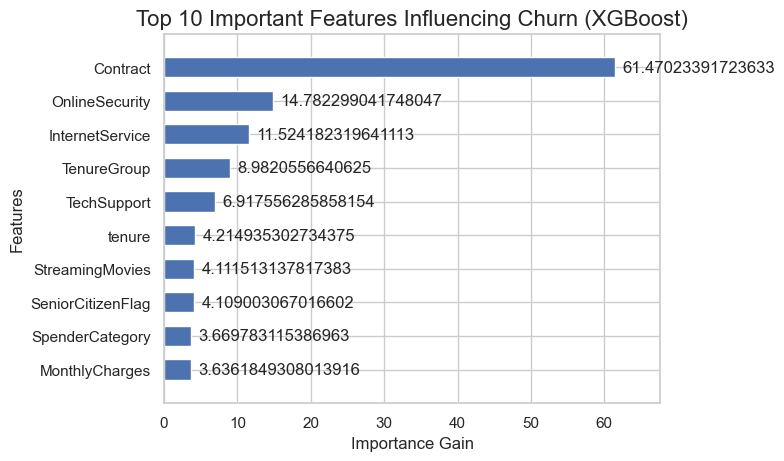

In [98]:
import matplotlib.pyplot as plt
import xgboost as xgb

# 1. Plot Feature Importance (Gain-based)
plt.figure(figsize=(12,8))
xgb.plot_importance(
    xgb_model,
    max_num_features=10,         # Show Top 10 features
    importance_type='gain',      # Use 'gain' importance (best one)
    show_values=True,
    xlabel='Importance Gain',
    height=0.6
)
plt.title('Top 10 Important Features Influencing Churn (XGBoost)', fontsize=16)
plt.show()


C:\Users\rocki\AppData\Local\Temp\ipykernel_11384\1088349120.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


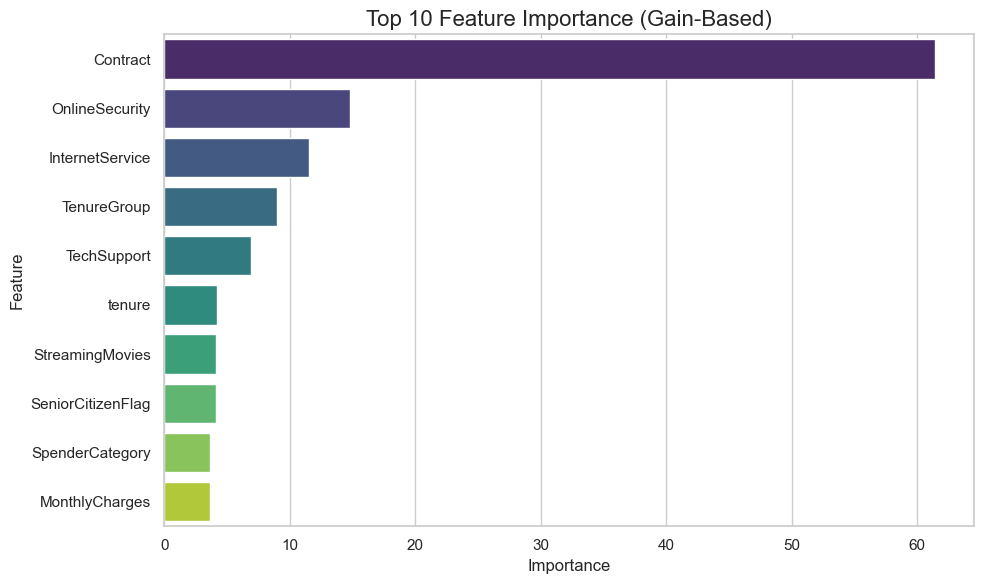

In [99]:
# Extract feature importances as a dictionary
feature_importances = xgb_model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(feature_importances.keys()),
    'Importance': list(feature_importances.values())
}).sort_values(by='Importance', ascending=False)

# Plot using Seaborn
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importance (Gain-Based)', fontsize=16)
plt.tight_layout()
plt.show()


In [101]:
# 1. Import libraries
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 2. Define the base model
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42
)


# 3. Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# 4. Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',       # Can also try 'f1', 'recall', etc.
    cv=3,                     # 3-fold cross-validation
    verbose=1,
    n_jobs=-1                 # Use all CPU cores
)

# 5. Run the grid search
grid_search.fit(X_train, y_train)

# 6. Best Parameters
print("Best Parameters:", grid_search.best_params_)

# 7. Best Estimator
best_model = grid_search.best_estimator_

# 8. Evaluate Best Model
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.8017
Confusion Matrix:
 [[941  92]
 [187 187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [103]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


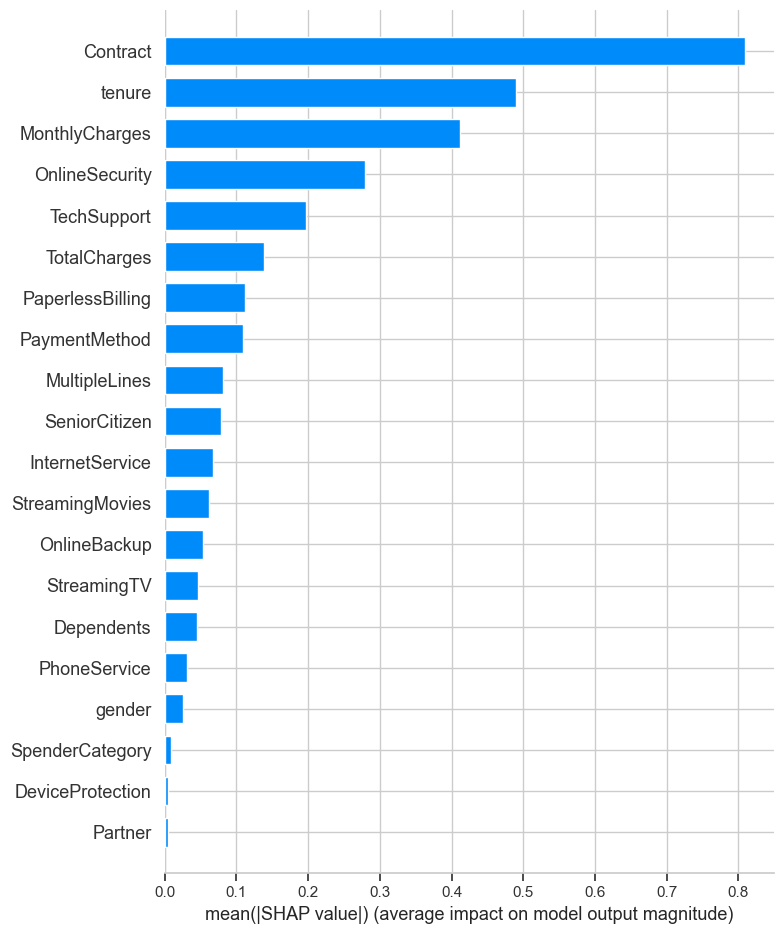

In [104]:
# 1. Import
import shap

# 2. Initialize SHAP explainer
explainer = shap.TreeExplainer(best_model)  # use best_model after tuning

# 3. Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# 4. Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [105]:
# 5. Pick a customer to explain (example: first one)
customer_index = 0  # you can change this!

# Force plot for individual prediction
shap.initjs()  # loads JavaScript visualizations
shap.force_plot(
    explainer.expected_value, 
    shap_values[customer_index,:], 
    X_test.iloc[customer_index,:]
)


In [107]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [108]:
# 1. Import
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Prepare Data (assuming X and y are already defined)

# 3. Split Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define and Train LightGBM model
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_model.fit(X_train, y_train)

# 5. Predict
y_pred = lgb_model.predict(X_test)

# 6. Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 7. Results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

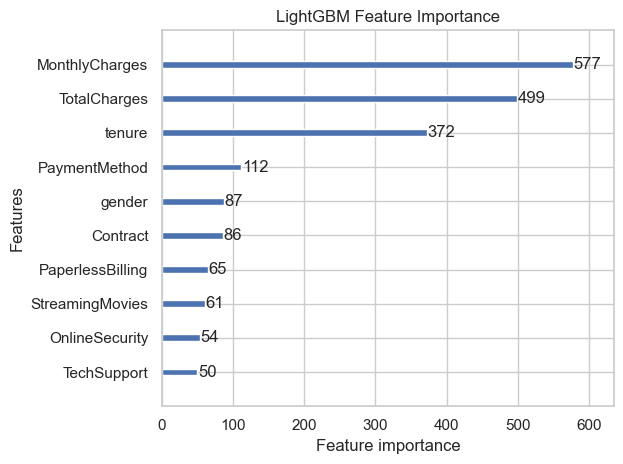

In [109]:
import matplotlib.pyplot as plt

lgb.plot_importance(lgb_model, max_num_features=10)
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()


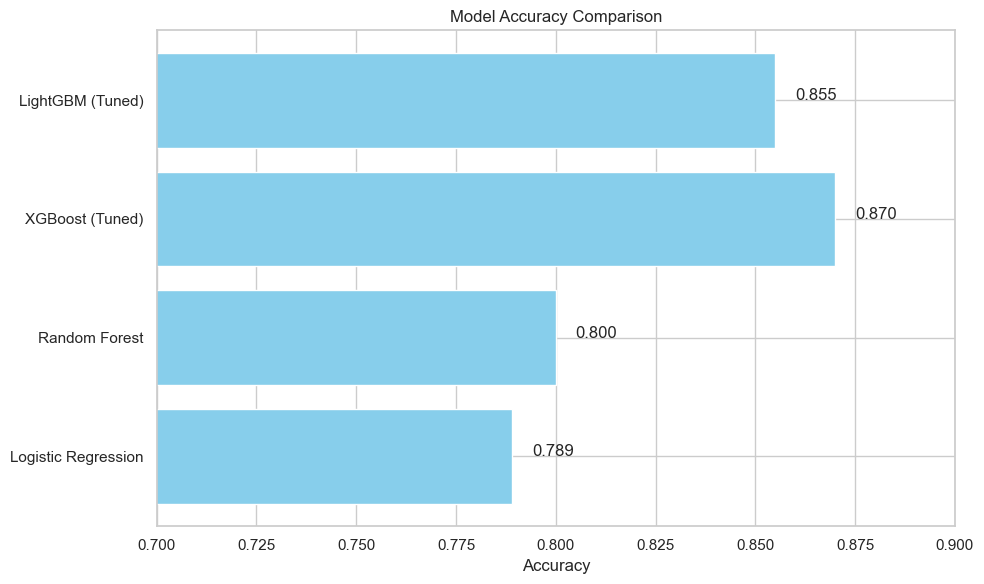

In [112]:
import matplotlib.pyplot as plt

# 1. Define model names and scores
models = ['Logistic Regression', 'Random Forest', 'XGBoost (Tuned)', 'LightGBM (Tuned)']
accuracies = [0.789, 0.800, 0.870, 0.855]

# 2. Plot
plt.figure(figsize=(10,6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
for index, value in enumerate(accuracies):
    plt.text(value + 0.005, index, f"{value:.3f}")
plt.xlim(0.7, 0.9)
plt.tight_layout()
plt.show()
